In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
%matplotlib inline

sns.set(style="whitegrid",rc={'figure.figsize': (12, 12)})

# Проект e-commerce

In [3]:
# чтение и запись данных в DF 
order_items = pd.read_csv('/Users/macuser/Downloads/olist_order_items_dataset.csv')
orders = pd.read_csv('/Users/macuser/Downloads/olist_orders_dataset.csv')
customers = pd.read_csv('/Users/macuser/Downloads/olist_customers_dataset.csv')

0. [EDA](#EDA)

1. [Сколько у нас пользователей, которые совершили покупку только один раз?](#onepurch)

2. [Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?](#delivery) 

3. [По каждому товару определить, в какой день недели товар чаще всего покупается.](#items) 

4. [Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?](#users) 

5. [Когортный анализ](#cohort)   

6. [RFM-сегментацию пользователей.](#rfm)



<a name="EDA"></a> 
# **EDA - Разведочный анализ данных** #

### Начнем с проверки всех дата-сетов на: ###
1. null-значения
2. есть ли столбцы с датами, ктр нужно преобразовать в соответствующий тип данных 
3. дубликаты 
4. посмотрим на описательную статистику дата-сетов, есть ли странные значения (к примеру, отриц стоимость и тд)

In [4]:
order_items.info()

# null нет 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [5]:
order_items.head()

# есть дата, у ктр сейчас тип данных - object, нужно исправить в корректный

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [4]:
order_items['shipping_limit_date'] = order_items['shipping_limit_date'].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S')

In [7]:
order_items.loc[order_items.duplicated()]

# отсутствуют дубликаты 

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


In [8]:
order_items.describe(include='all')

/var/folders/jq/xsrks5ps78jbmh4p6prf04qw0000gn/T/ipykernel_60705/3070327690.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_items.describe(include='all')


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
first,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000


In [9]:
orders.info()

# есть null в 3 столбцах, стоит проверить далее почему и нормально ли это 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [10]:
orders.head()

# есть даты, у ктр сейчас тип данных - object, нужно исправить в корректный

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
orders[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']] = orders[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S')

In [12]:
orders.loc[orders.duplicated()]

# отсутствуют дубликаты 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [13]:
orders.describe(include='all')

/var/folders/jq/xsrks5ps78jbmh4p6prf04qw0000gn/T/ipykernel_60705/3440501736.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders.describe(include='all')
/var/folders/jq/xsrks5ps78jbmh4p6prf04qw0000gn/T/ipykernel_60705/3440501736.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders.describe(include='all')
/var/folders/jq/xsrks5ps78jbmh4p6prf04qw0000gn/T/ipykernel_60705/3440501736.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to sil

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [14]:
customers.info()

# null нет 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [15]:
customers.head()

# даты отсутсвуют

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [16]:
customers.loc[customers.duplicated()]

# отсутствуют дубликаты 

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


In [17]:
customers.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [18]:
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

### Вернемся к таблице orders и изучим пропущенные значения. ###

_Значения были пропущены в след колонках:_

* order_approved_at —  время подтверждения оплаты заказа

* order_delivered_carrier_date —  время передачи заказа в логистическую службу

* order_delivered_customer_date —  время доставки заказа

In [6]:
orders.groupby('order_status')[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].apply(lambda x: x.isnull().sum())

,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date
order_status,,,
approved,0,2,2
canceled,141,550,619
created,5,5,5
delivered,14,2,8
invoiced,0,314,314
processing,0,301,301
shipped,0,0,1107
unavailable,0,609,609


_Уникальные статусы заказов в таблице orders:_

- created —  создан
- approved —  подтверждён
- invoiced —  выставлен счёт
- processing —  в процессе сборки заказа
- shipped —  отгружен со склада
- delivered —  доставлен пользователю
- unavailable —  недоступен
- canceled —  отменён

Полученные пропуски в столбцах created, approved, canceled, invoiced, unavailable, processing (_нормальная ситуация, когда пропуск только в столбцах order_delivered_carrier_date и order_delivered_customer_date_), shipped (_нормальная ситуация, когда пропуск только в столбце order_delivered_customer_date_). 
Для статуса delivered не должно быть пропусков ни в одном из вышеуказанных 3х столбцов: либо произошел сбой в системе, либо оплата не прошла у покупателя или заказ не был доставлен, поэтому записи с пропусками в этих столбцах я не буду считать покупкой.

**_Покупкой_** я буду считать заказы, который были: 
1. **оплачены** (мы получили свои денежные средства и это наш оборотный актив **на текущий момент времени**, если кто-то сделает отмену или возврат, то это учтется уже в след периоде), то есть со статусом **delivered, shipped, processing**  
и 
2. для статуса delivered **нет пропущенных записей** в столбцах order_approved_at order_delivered_carrier_date	order_delivered_customer_date; для статуса shipped нет пропущенных записей в столбце order_delivered_customer_date; для статуса processing нет пропусков в столбцах order_delivered_carrier_date и order_delivered_customer_date. 

Перед джойном таблиц проверим их размер до присоединения, чтобы убедиться, что мы не потеряли значения. 
Таблицы orders и customers связаны по полю - customer_id, а orders и order_items по полю order_id. 

In [20]:
orders.shape

(99441, 8)

In [21]:
customers.shape

(99441, 5)

In [22]:
order_items.shape

(112650, 7)

In [7]:
ord_custs = orders.merge(customers, how= 'left', on='customer_id')

In [24]:
ord_custs.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [25]:
ord_custs.shape

# ok

(99441, 12)

 <a name="onepurch"></a> 
 ### 1. **Сколько у нас пользователей, которые совершили покупку только один раз?** ###

In [8]:
cond_delivered= ord_custs[(ord_custs[['order_delivered_carrier_date', 'order_approved_at', 'order_delivered_customer_date']].notnull().all(axis=1)) & (ord_custs['order_status'] == 'delivered')]
cond_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [9]:
purchs = ord_custs.loc[(ord_custs.order_status == 'shipped') | (ord_custs.order_status == ' processing')]
purchs.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,08fb46d35bb3ab4037202c23592d1259,13215,jundiai,SP
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,528b011eb7fab3d59c336cc7248eed3a,38600,paracatu,MG
162,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaT,2017-06-08,10669e874b7ddaab97d6d539578576d7,54762,camaragibe,PE
231,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,NaT,2017-12-13,7eb6b25c03556dfd2a2ee982f42074c2,91450,porto alegre,RS
299,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaT,2018-08-03,1c13e7a690e418f5a133c8a219b5a124,20910,rio de janeiro,RJ


In [10]:
total_purchs = pd.concat([purchs, cond_delivered])
total_purchs.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,08fb46d35bb3ab4037202c23592d1259,13215,jundiai,SP
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,528b011eb7fab3d59c336cc7248eed3a,38600,paracatu,MG
162,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaT,2017-06-08,10669e874b7ddaab97d6d539578576d7,54762,camaragibe,PE
231,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,NaT,2017-12-13,7eb6b25c03556dfd2a2ee982f42074c2,91450,porto alegre,RS
299,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaT,2018-08-03,1c13e7a690e418f5a133c8a219b5a124,20910,rio de janeiro,RJ


In [11]:
total_purchs = total_purchs.groupby('customer_unique_id', as_index=False).agg({'order_id': 'nunique'}).rename(columns={'order_id':'num_of_purch'})

In [12]:
total_purchs.sort_values(by = 'num_of_purch', ascending=False)

,customer_unique_id,num_of_purch
52013,8d50f5eadf50201ccdcedfb9e2ac8455,16
23036,3e43e6105506432c953e165fb2acf44c,9
74727,ca77025e7201e3b30c44b472ff346268,7
37133,6469f99c1f9dfae7733b25662e7f1782,7
10172,1b6c7548a2a1f9037c1fd3ddfed95f33,7
...,...,...
31916,56550de806540216e8a5fd85d5597678,1
31915,565482c4a27a7c7f86870a5ab4ea0a85,1
31914,5654780522c8bd0731cc276d2e7185d9,1
31913,56546b71f8bf254f860014fae431af6d,1


### Ответ на первый вопрос: ###

In [13]:
one_purch = total_purchs.loc[total_purchs.num_of_purch == 1].agg({'customer_unique_id': 'count'})
one_purch
one_purch/94377
# Можем также сделать вывод, что подавляющее большинство покупателей делают только один заказ (91517 из 94377, ~97%)

customer_unique_id    0.969696
dtype: float64

 <a name="delivery"></a> 
### 2. **Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?** ###

Исходя из имеющихся статусов заказы, **недоставленными** буду считать заказы со статусами **unavailable** (предположу, что это заказы, по ктр нет информации и они не были доставлены по разным причинам) и **canceled** (предположу, что это заказы, ктр были отменены по инициативе покупателя ИЛИ продавца)

In [14]:
undelivered_orders = ord_custs.loc[(ord_custs.order_status == 'canceled') | (ord_custs.order_status == 'unavailable')]

undelivered_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,41fc647b8c6bd979b1b6364b60471b50,89288,sao bento do sul,SC
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14,8ea097b1824dbd4d17af71b0afe04301,5514,sao paulo,SP
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,0e634b16e4c585acbd7b2e8276ce6677,11701,praia grande,SP
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22,c4ebedb09beb89cc0314c5c0c33f8053,9961,diadema,SP
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,596ed6d7a35890b3fbac54ec01f69685,2318,sao paulo,SP


In [15]:
undelivered_orders[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']] = undelivered_orders[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S')

/var/folders/jq/xsrks5ps78jbmh4p6prf04qw0000gn/T/ipykernel_65593/2070269558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  undelivered_orders[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']] = undelivered_orders[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S')


In [34]:
undelivered_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1234 entries, 266 to 99415
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       1234 non-null   object        
 1   customer_id                    1234 non-null   object        
 2   order_status                   1234 non-null   object        
 3   order_purchase_timestamp       1234 non-null   datetime64[ns]
 4   order_approved_at              1093 non-null   datetime64[ns]
 5   order_delivered_carrier_date   75 non-null     datetime64[ns]
 6   order_delivered_customer_date  6 non-null      datetime64[ns]
 7   order_estimated_delivery_date  1234 non-null   datetime64[ns]
 8   customer_unique_id             1234 non-null   object        
 9   customer_zip_code_prefix       1234 non-null   int64         
 10  customer_city                  1234 non-null   object        
 11  customer_state

Недоставленные товары логичнее считать от даты order_approved_at (дата подтверждения оплаты заказа), тк покупатель был точно намерен получить товар, тк оплатил его уже, а не просто создал заказ и отфильтруем na.

In [16]:
undelivered_orders['month_of_order'] = undelivered_orders.order_approved_at.dt.strftime('%Y-%m')

/var/folders/jq/xsrks5ps78jbmh4p6prf04qw0000gn/T/ipykernel_65593/2206026031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  undelivered_orders['month_of_order'] = undelivered_orders.order_approved_at.dt.strftime('%Y-%m')


In [17]:
undelivered_orders = undelivered_orders[~undelivered_orders.order_approved_at.isna()]
undelivered_orders.head()

# 1093 rows × 13 columns

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,month_of_order
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,41fc647b8c6bd979b1b6364b60471b50,89288,sao bento do sul,SC,2017-11
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14,8ea097b1824dbd4d17af71b0afe04301,5514,sao paulo,SP,2018-08
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16,0e634b16e4c585acbd7b2e8276ce6677,11701,praia grande,SP,2018-01
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22,c4ebedb09beb89cc0314c5c0c33f8053,9961,diadema,SP,2018-01
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,596ed6d7a35890b3fbac54ec01f69685,2318,sao paulo,SP,2017-08


In [18]:
undelivered_orders = undelivered_orders.groupby(['month_of_order', 'order_status'], as_index = False).agg({'order_id':"nunique"}).rename(columns={'order_id': 'undelivered_ords'})

### Ответ на второй вопрос: ###

Всего не было доставлено 1093 товара за весь период: 484 было отменено одной из сторон, 609 недоступны. 

In [19]:
undelivered_orders.groupby('order_status').undelivered_ords.sum()

order_status
canceled       484
unavailable    609
Name: undelivered_ords, dtype: int64

Разбивка по причинам и месяцам недоставленных товаров. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '2016-10'),
  Text(1, 0, '2017-01'),
  Text(2, 0, '2017-02'),
  Text(3, 0, '2017-03'),
  Text(4, 0, '2017-04'),
  Text(5, 0, '2017-05'),
  Text(6, 0, '2017-06'),
  Text(7, 0, '2017-07'),
  Text(8, 0, '2017-08'),
  Text(9, 0, '2017-09'),
  Text(10, 0, '2017-10'),
  Text(11, 0, '2017-11'),
  Text(12, 0, '2017-12'),
  Text(13, 0, '2018-01'),
  Text(14, 0, '2018-02'),
  Text(15, 0, '2018-03'),
  Text(16, 0, '2018-04'),
  Text(17, 0, '2018-05'),
  Text(18, 0, '2018-06'),
  Text(19, 0, '2018-07'),
  Text(20, 0, '2018-08')])

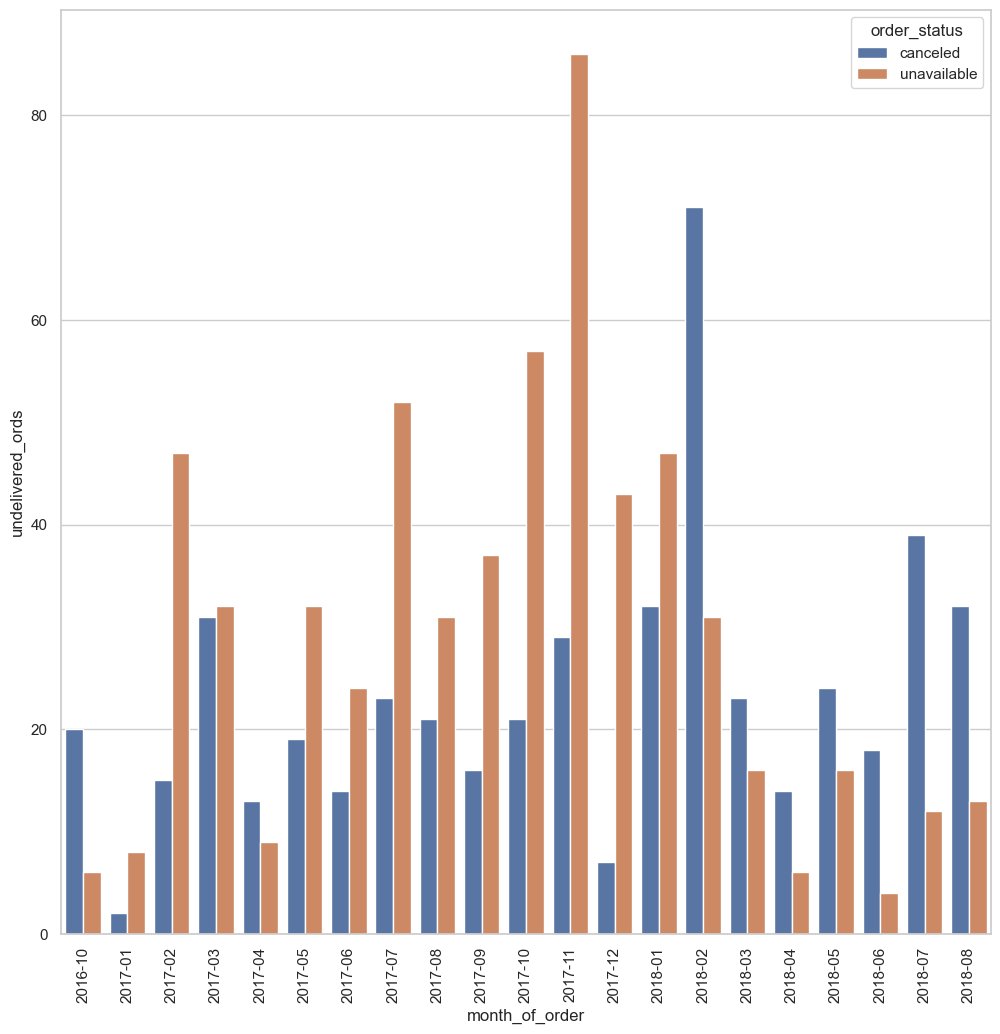

In [20]:
sns.barplot(data=undelivered_orders, x='month_of_order', y='undelivered_ords', hue='order_status')
plt.xticks(rotation=90)

В среднем в месяц не было доставлено ~52 товара. 

In [21]:
undelivered_orders.groupby('month_of_order').undelivered_ords.sum().mean()

52.04761904761905

In [24]:
undelivered_orders.month_of_order.isnull().sum()

0

<a name="items"></a> 
### 3. По каждому товару определить, в какой день недели товар чаще всего покупается. ###

Для решения этой задачи нужно объединить все три дата-сета. 

In [25]:
ord_custs_items = ord_custs.merge(order_items, how='left', on = 'order_id')

В данной задаче я бы не фильтровала по статусу заказа, а за основую дата взяла дату, когда покупатель решил создать заказ (неважно, что там дальше с ним произошло) - order_purchase_timestamp. 

In [42]:
ord_custs_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113425 entries, 0 to 113424
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113425 non-null  object        
 1   customer_id                    113425 non-null  object        
 2   order_status                   113425 non-null  object        
 3   order_purchase_timestamp       113425 non-null  datetime64[ns]
 4   order_approved_at              113264 non-null  datetime64[ns]
 5   order_delivered_carrier_date   111457 non-null  datetime64[ns]
 6   order_delivered_customer_date  110196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113425 non-null  datetime64[ns]
 8   customer_unique_id             113425 non-null  object        
 9   customer_zip_code_prefix       113425 non-null  int64         
 10  customer_city                  113425 non-null  object        
 11  

In [26]:
ord_custs_items['order_purchase_timestamp'] = pd.to_datetime(ord_custs_items['order_purchase_timestamp'])

In [27]:
ord_custs_items['day_of_week'] = ord_custs_items.order_purchase_timestamp.dt.day_name()

In [45]:
ord_custs_items.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,day_of_week
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,Tuesday


У некоторых товаров может быть два и более дней с одинаковым максимальным числом покупок, сначала найдем максимальное количество покупок для каждого товара, а затем выведем все дни с максимальным значением.

**Таблица с ответом на вопрос 3:**

In [37]:
purchases_day = ord_custs_items.groupby(['product_id', 'day_of_week']) \
                           .agg({'price': 'count'}) \
                           .reset_index()

pivot_purchases = purchases_day.pivot(index='product_id', columns='day_of_week', values='price')
max_purchases = pivot_purchases.max(axis=1)

result = []

for product_id in pivot_purchases.index:
    days_with_max = pivot_purchases.columns[pivot_purchases.loc[product_id] == max_purchases[product_id]].tolist()
    result.append({'product_id': product_id, 'days_of_purchase': days_with_max})

days_with_max_pucrchases = pd.DataFrame(result)

In [39]:
days_with_max_pucrchases.head(10)

,product_id,days_of_purchase
0,00066f42aeeb9f3007548bb9d3f33c38,[Sunday]
1,00088930e925c41fd95ebfe695fd2655,[Tuesday]
2,0009406fd7479715e4bef61dd91f2462,[Thursday]
3,000b8f95fcb9e0096488278317764d19,"[Friday, Wednesday]"
4,000d9be29b5207b54e86aa1b1ac54872,[Tuesday]
5,0011c512eb256aa0dbbb544d8dffcf6e,[Thursday]
6,00126f27c813603687e6ce486d909d01,[Sunday]
7,001795ec6f1b187d37335e1c4704762e,[Saturday]
8,001b237c0e9bb435f2e54071129237e9,[Thursday]
9,001b72dfd63e9833e8c02742adf472e3,[Wednesday]


 <a name="users"></a> 
### 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 


Для ответа на этот вопрос воспользуемся таблицей, созданной в п.1, поскольку в ней учитываются только **покупки**, с которыми мы определились ранее.  
Основной датой буду считать месяц и год order_approved_at, поскольку в эту дату покупатель оплатил покупку. 

In [54]:
total_purchase = pd.concat([purchs, cond_delivered])
total_purchase['order_approved_at'] = pd.to_datetime(total_purchase['order_approved_at'])

Также логично определить дату начала и конца дата-сета, чтобы убрать неполные месяцы начала и окончания. 

In [55]:
total_purchase.order_approved_at.max()

Timestamp('2018-09-03 17:40:06')

In [56]:
total_purchase.order_approved_at.min()

Timestamp('2016-09-15 12:16:38')

In [60]:
total_purchase.month_of_order.value_counts()

2017-11    7220
2018-03    7217
2018-01    7064
2018-05    6994
2018-04    6738
2018-02    6592
2018-08    6551
2018-06    6136
2018-07    6109
2017-12    5733
2017-10    4474
2017-08    4258
2017-09    4209
2017-07    3882
2017-05    3601
2017-06    3191
2017-03    2599
2017-04    2327
2017-02    1659
2017-01     731
2016-10     274
2016-12       1
Freq: M, Name: month_of_order, dtype: int64

In [58]:
total_purchase = total_purchase.loc[(total_purchase.order_approved_at >= '2016-10-01 00:00:00') & (total_purchase.order_approved_at < '2018-09-01 00:00:00') ]

In [59]:
total_purchase['month_of_order'] = total_purchase.order_approved_at.dt.to_period('M')

/var/folders/jq/xsrks5ps78jbmh4p6prf04qw0000gn/T/ipykernel_60705/410607929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_purchase['month_of_order'] = total_purchase.order_approved_at.dt.to_period('M')


In [61]:
purchs_per_month = total_purchase.groupby(['customer_unique_id', 'month_of_order'], as_index=False).agg({'order_id': 'nunique'}).sort_values('order_id')

In [62]:
purchs_per_month['weeks_in_month'] = purchs_per_month.month_of_order.dt.days_in_month.apply(lambda x: x / 7)

In [63]:
purchs_per_month['mean_purchs'] = round(purchs_per_month.order_id / purchs_per_month.weeks_in_month, 2)

### Ответ на 4 вопрос в таблице ниже: ###

In [64]:
purchs_per_month

,customer_unique_id,month_of_order,order_id,weeks_in_month,mean_purchs
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,4.428571,0.23
63956,a9e4348b76f85861ada324e72dc92aca,2018-04,1,4.285714,0.23
63955,a9e4348b76f85861ada324e72dc92aca,2017-12,1,4.428571,0.23
63954,a9e30a7260591d7af904d38ec41d449b,2018-02,1,4.000000,0.25
63953,a9e21dbc0a0e69348c3895c18f8d8d60,2018-08,1,4.428571,0.23
...,...,...,...,...,...
49692,83e7958a94bd7f74a9414d8782f87628,2017-01,4,4.428571,0.90
61041,a239b8e2fbce33780f1f1912e2ee5275,2017-02,4,4.000000,1.00
68107,b4e4f24de1e8725b74e4a1f4975116ed,2018-02,4,4.000000,1.00
75377,c8460e4251689ba205045f3ea17884a1,2018-08,4,4.428571,0.90


<a name="cohort"></a> 
## Когортный анализ пользователей 

### В период с января по декабрь выявите когорту с самым высоким retention на 3-й месяц. ### 

Перед проведением когортного анализа определяют четыре параметра:
1. Признак формирования когорты — действие, которое объединяет людей в группу: в нашем случае - это совершение первой покупки. 
2. Размер когорты — месяц.
3. Отчетный период — янв-дек 2017 г - единственный "полный" год в данных. 
4. Анализируемый ключевой показатель: Retention Rate. 

In [41]:
purchases = pd.concat([purchs, cond_delivered])
purchases['order_approved_at'] = pd.to_datetime(purchases['order_approved_at'])
purchases['month_of_order'] = purchases.order_approved_at.dt.to_period('M')
purchases = purchases.loc[(purchases.order_approved_at >= '2017-01-01 00:00:00') & (purchases.order_approved_at < '2018-01-01 00:00:00')]
purchases.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,month_of_order
162,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaT,2017-06-08,10669e874b7ddaab97d6d539578576d7,54762,camaragibe,PE,2017-05
231,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,NaT,2017-12-13,7eb6b25c03556dfd2a2ee982f42074c2,91450,porto alegre,RS,2017-11
430,6147a4d49752afd35a119d794e481588,938698ae953596e231326da5ff220f68,shipped,2017-04-25 13:35:09,2017-04-25 13:45:16,2017-05-02 15:29:33,NaT,2017-05-29,545d52845f89fb2a0069f8af963812de,72715,brasilia,DF,2017-04
444,95e42e6aaf6264cd3e77c06b32dc3003,29ef1f160ce630146dafa02052e2c5bf,shipped,2017-11-24 09:23:33,2017-11-24 10:51:26,2017-11-24 19:07:43,NaT,2017-12-08,68e9aca85421a3dc655325bcdf9c9912,3271,sao paulo,SP,2017-11
540,10918fe4d665fda80034712895c2b92f,e05a24d2c1d2cd3ae0482ecc1b4d069f,shipped,2017-06-26 07:04:39,2017-06-26 10:32:39,2017-07-04 11:27:21,NaT,2017-08-03,63386c87125fd15ae6798a09856e9eff,66820,belem,PA,2017-06


In [42]:
purchases= purchases[['customer_unique_id', 'month_of_order', 'order_status', 'order_id']]
purchases.duplicated().sum()

0

In [43]:
first_order = purchases. groupby('customer_unique_id', as_index=False).agg({'month_of_order': 'min'}).rename(columns={'month_of_order': 'first_order'})

Оставим только нужные столбцы в дата-сете и затем объединим основной сет с сетом, содержащим дату первой покупки. 

In [44]:
purchases = purchases[['customer_unique_id', 'month_of_order', 'order_status']]
cohort = purchases.merge(first_order, how='inner', on ='customer_unique_id')
cohort.head()

,customer_unique_id,month_of_order,order_status,first_order
0,10669e874b7ddaab97d6d539578576d7,2017-05,shipped,2017-05
1,7eb6b25c03556dfd2a2ee982f42074c2,2017-11,shipped,2017-11
2,545d52845f89fb2a0069f8af963812de,2017-04,shipped,2017-04
3,68e9aca85421a3dc655325bcdf9c9912,2017-11,shipped,2017-11
4,63386c87125fd15ae6798a09856e9eff,2017-06,shipped,2017-06


In [45]:
#столбец с разницей между датой покупки и датой первой покупки 
cohort['date_diff'] = cohort.month_of_order.dt.month - cohort.first_order.dt.month
cohort.head()

,customer_unique_id,month_of_order,order_status,first_order,date_diff
0,10669e874b7ddaab97d6d539578576d7,2017-05,shipped,2017-05,0
1,7eb6b25c03556dfd2a2ee982f42074c2,2017-11,shipped,2017-11,0
2,545d52845f89fb2a0069f8af963812de,2017-04,shipped,2017-04,0
3,68e9aca85421a3dc655325bcdf9c9912,2017-11,shipped,2017-11,0
4,63386c87125fd15ae6798a09856e9eff,2017-06,shipped,2017-06,0


In [46]:
# df для когортного анализа 
cohort_analisys = cohort.groupby(['first_order', 'date_diff'], as_index=False).agg({'customer_unique_id': 'nunique'})

cohort_analisys

,first_order,date_diff,customer_unique_id
0,2017-01,0,698
1,2017-01,1,4
2,2017-01,2,2
3,2017-01,3,1
4,2017-01,4,3
...,...,...,...
72,2017-10,1,30
73,2017-10,2,13
74,2017-11,0,6997
75,2017-11,1,39


In [47]:
# df с количеством первых покупателей по дням 
uniq_custs = cohort.groupby('first_order').agg({'customer_unique_id': 'nunique'}).rename(columns={'customer_unique_id': 'first_orders'})
uniq_custs

,first_orders
first_order,
2017-01,698
2017-02,1632
2017-03,2553
2017-04,2277
2017-05,3504
2017-06,3090
2017-07,3762
2017-08,4119
2017-09,4061


In [48]:
cohort_analisys = cohort_analisys.merge(uniq_custs, on = 'first_order')
cohort_analisys.head()

,first_order,date_diff,customer_unique_id,first_orders
0,2017-01,0,698,698
1,2017-01,1,4,698
2,2017-01,2,2,698
3,2017-01,3,1,698
4,2017-01,4,3,698


In [49]:
cohort_analisys['cohort'] = (cohort_analisys.customer_unique_id / cohort_analisys.first_orders)

In [50]:
cohort_analisys = cohort_analisys.pivot(columns = 'date_diff', index = 'first_order', values = 'cohort').fillna(0)

In [51]:
ur_style = (cohort_analisys
            .style
            .set_caption('User retention by cohort')  # добавляем подпись
            .background_gradient(cmap='viridis')  # раскрашиваем ячейки по столбцам
            .highlight_null('white')  # делаем белый фон для значений NaN
            .format("{:.2%}", na_rep=""))  # числа форматируем как проценты, NaN заменяем на пустоту
ur_style

date_diff,0,1,2,3,4,5,6,7,8,9,10,11
first_order,,,,,,,,,,,,
2017-01,100.00%,0.57%,0.29%,0.14%,0.43%,0.14%,0.43%,0.14%,0.14%,0.00%,0.29%,0.29%
2017-02,100.00%,0.25%,0.25%,0.18%,0.43%,0.12%,0.25%,0.18%,0.06%,0.18%,0.12%,0.00%
2017-03,100.00%,0.51%,0.35%,0.35%,0.35%,0.16%,0.16%,0.31%,0.27%,0.12%,0.00%,0.00%
2017-04,100.00%,0.61%,0.22%,0.18%,0.26%,0.26%,0.35%,0.26%,0.35%,0.00%,0.00%,0.00%
2017-05,100.00%,0.54%,0.49%,0.37%,0.31%,0.34%,0.43%,0.14%,0.00%,0.00%,0.00%,0.00%
2017-06,100.00%,0.45%,0.36%,0.39%,0.26%,0.32%,0.36%,0.00%,0.00%,0.00%,0.00%,0.00%
2017-07,100.00%,0.53%,0.32%,0.19%,0.35%,0.19%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
2017-08,100.00%,0.68%,0.36%,0.27%,0.36%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
2017-09,100.00%,0.66%,0.49%,0.34%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


### Ответ на 5 вопрос: ###
Когорта с самым высоким retention на 3-й месяц - 2017-06. 

 <a name="rfm"></a> 
### 6. RFM-сегментация пользователей. ### 

RFM-сегментация пользователей, чтобы качественно оценить свою аудиторию:
R - время от последней покупки пользователя до текущей даты, 
F - суммарное количество покупок у пользователя за всё время,
M - сумма покупок за всё время. 

Для каждого RFM-сегмента построить границы метрик recency, frequency и monetary для интерпретации этих кластеров. 

In [52]:
rfm_df = pd.concat([purchs, cond_delivered])
# также нужны будут данные из order_items, чтобы рассчитать М 
df_full_rfm = rfm_df.merge(order_items, how='left', on='order_id')
df_full_rfm['order_approved_at'] = pd.to_datetime(df_full_rfm['order_approved_at'])

In [53]:
print('Orders from {} to {}'.format(df_full_rfm['order_approved_at'].min(),
                                    df_full_rfm['order_approved_at'].max()))

Orders from 2016-09-15 12:16:38 to 2018-09-03 17:40:06


Установим дату now - один день после последней покупки. Эта дата будет использоваться в качестве справочной для расчета Recency балла.

In [54]:
NOW = df_full_rfm['order_approved_at'].max() + timedelta(days=1) 
NOW

Timestamp('2018-09-04 17:40:06')

In [55]:
rfm_orders = df_full_rfm.groupby(['order_id', 'order_approved_at', 'customer_unique_id'], as_index=False).agg({'price': 'sum'})
rfm_orders

,order_id,order_approved_at,customer_unique_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 09:45:35,871766c5855e863f6eccc05f988b23cb,58.90
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 11:05:13,eb28e67c4c0b83846050ddfb8a35d051,239.90
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:48:30,3818d81c6709e39d06b2738a8d3a2474,199.00
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:10:18,af861d436cfc08b2c2ddefd0ba074622,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 14:10:13,64b576fb70d441e8f1b2d7d446e483c5,199.90
...,...,...,...,...
97557,fffc94f6ce00a00581880bf54a75a037,2018-04-25 04:11:01,0c9aeda10a71f369396d0c04dce13a64,299.99
97558,fffcd46ef2263f404302a634eb57f7eb,2018-07-17 04:31:48,0da9fe112eae0c74d3ba1fe16de0988b,350.00
97559,fffce4705a9662cd70adb13d4a31832d,2017-10-24 17:14:25,cd79b407828f02fdbba457111c38e4c4,99.90
97560,fffe18544ffabc95dfada21779c9644f,2017-08-15 00:04:32,eb803377c9315b564bdedad672039306,55.99


In [56]:
rfm_orders['DaysSinceOrder'] = rfm_orders['order_approved_at'].apply(lambda x: (NOW - x).days)
rfm_orders.head()

,order_id,order_approved_at,customer_unique_id,price,DaysSinceOrder
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 09:45:35,871766c5855e863f6eccc05f988b23cb,58.90,356
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 11:05:13,eb28e67c4c0b83846050ddfb8a35d051,239.90,496
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:48:30,3818d81c6709e39d06b2738a8d3a2474,199.00,233
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:10:18,af861d436cfc08b2c2ddefd0ba074622,12.99,27
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 14:10:13,64b576fb70d441e8f1b2d7d446e483c5,199.90,577


In [57]:
rfm = rfm_orders.groupby('customer_unique_id') \
    .agg({'DaysSinceOrder': 'min', 'order_id': 'nunique', 'price':'sum'}) \
    .reset_index()\
    .rename(columns={'DaysSinceOrder': 'Recency', 'order_id': 'Frequency', 'price': 'Monetary'})
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00


Еще на этапе первого вопросы мы выяснили, что ~97% всех попкупателей совершили покупку 1 раз, поэтому надо уточнить Frequency, ранжирование будет следующим - 1 покупка - рейтинг 1, 2 покупки - 2, 3 и более покупки - 3. 

In [58]:
def frequency_score(x):
    if x == 1:
        return 1
    elif x == 2: 
        return 2
    else: 
        return 3

Теперь посмотрим на квантили 

In [59]:
quintiles_33 = rfm[['Recency', 'Frequency', 'Monetary']].quantile([0.33, 0.67]).to_dict()
quintiles_33

{'Recency': {0.33: 152.0, 0.67: 297.0},
 'Frequency': {0.33: 1.0, 0.67: 1.0},
 'Monetary': {0.33: 57.9, 0.67: 129.0}}

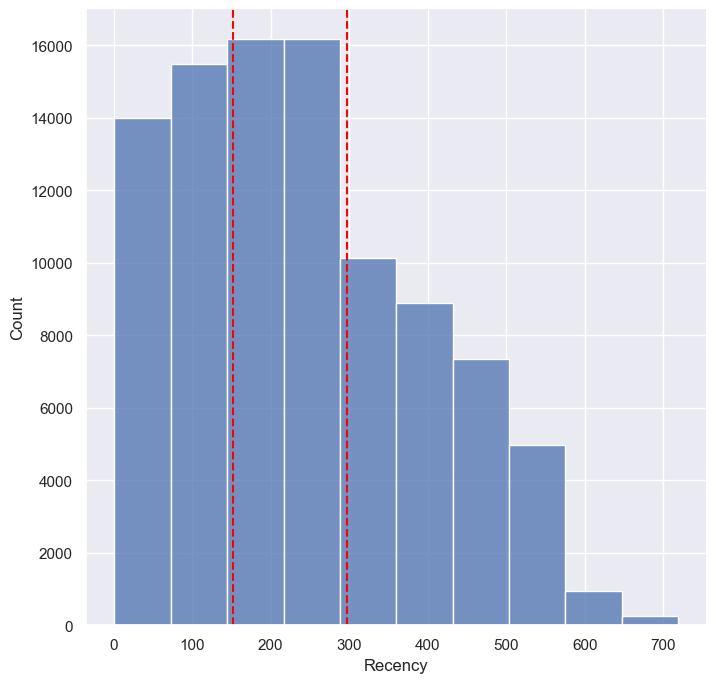

In [61]:
sns.set(rc={'figure.figsize': (8, 8)})
hist = sns.histplot(rfm.Recency, kde=False, bins=10)
sns.despine()

q1r = rfm['Recency'].quantile(0.33)  
q2r = rfm['Recency'].quantile(0.67)
plt.axvline(x=q1r, color='red', linestyle='--')
plt.axvline(x=q2r, color='red', linestyle='--')

Recency можно разбить на три сегмента по границам процентилей: 1-152 дня новых пользователей, 153-297 дней для средних и от 297 до 719 - для всех остальных. 

In [86]:
def recency_score(x):
    if x <= 152:
        return 3
    elif x > 297:
        return 1
    else:
        return 2


In [87]:
rfm.Monetary.describe()

count    94377.000000
mean       141.656621
std        215.534293
min          0.000000
25%         47.700000
50%         89.700000
75%        154.890000
max      13440.000000
Name: Monetary, dtype: float64

Видим, что среднее в monetory = 89, 75% процентиль = 154, но макс значение более 13000, но кажется, что покупателей, ктр заплатили более 1000 крайне мало, надо внимательно изучить данные. 

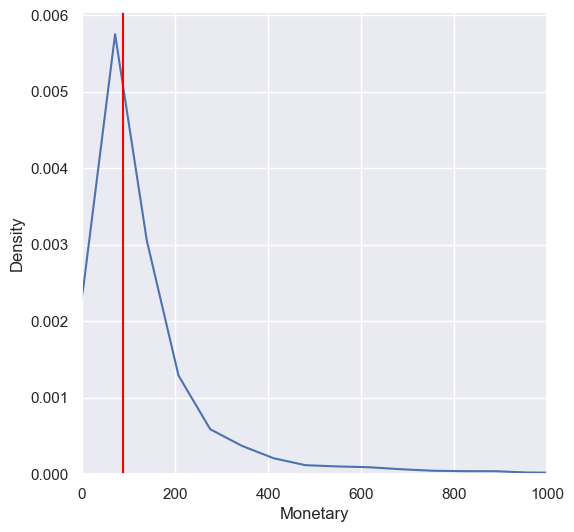

In [83]:
sns.kdeplot(rfm.Monetary)
plt.xlim(0, 1000)
data = rfm[rfm['Monetary'] <= 1000]
median = data.Monetary.median()
plt.axvline(median, color ='red')
plt.show()

я бы разбила клиентов по Monetary на 3 сегмента: > 1000 - 3 сегмент, 89 руб < покупка < 1000 - 2, а всех остальных - в 3

In [84]:
def monetary_score(x):
    if x <= 89:
        return 1
    elif x > 1000:
        return 3
    else:
        return 2

In [88]:
rfm['R_score'] = rfm.Recency.apply(lambda x: recency_score(x)).astype('str')
rfm['F_score'] = rfm.Frequency.apply(lambda x: frequency_score(x)).astype('str')
rfm['M_score'] = rfm.Monetary.apply(lambda x: monetary_score(x)).astype('str')
rfm['RFM'] = rfm.R_score + rfm.F_score + rfm.M_score
rfm.F_score.value_counts()

1    91517
2     2628
3      232
Name: F_score, dtype: int64

In [89]:
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,3,1,2,312
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,3,1,1,311
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,1,111
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,1,1,1,111
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,2,212


<Axes: xlabel='RFM', ylabel='count'>

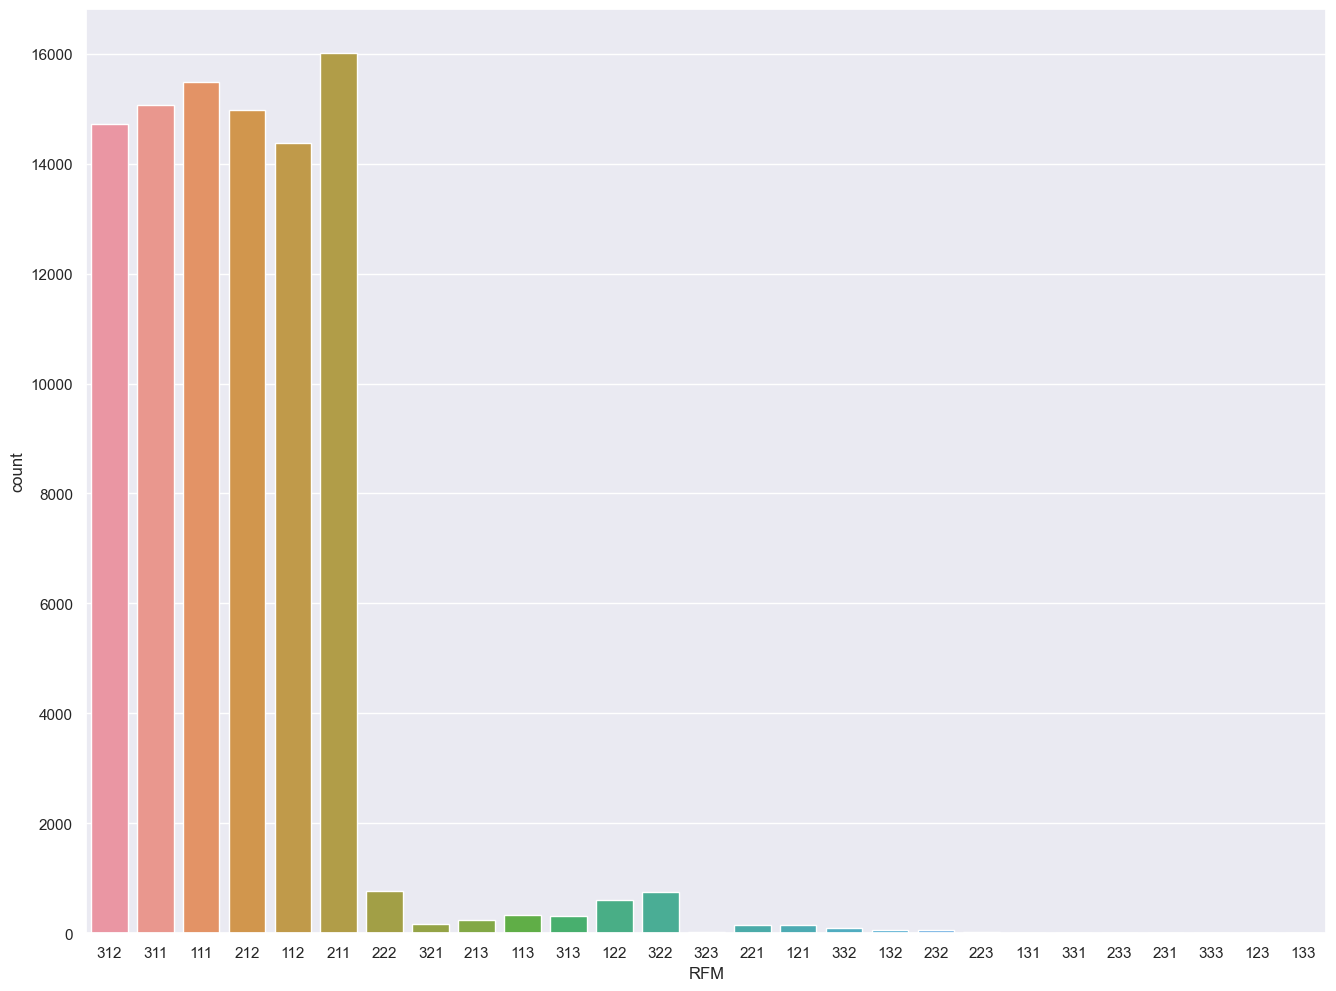

In [91]:
plt.figure(figsize=(16, 12))
sns.countplot(x='RFM', data=rfm)

In [105]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

rfm['Segment'] = rfm['R_score'].map(str) + rfm['M_score'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,3,1,2,312,about to sleep
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,3,1,1,311,about to sleep
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,1,111,hibernating
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,1,1,1,111,hibernating
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,2,212,hibernating


In [106]:
segments = rfm['Segment'].value_counts().reset_index()
segments

,index,Segment
0,hibernating,62629
1,about to sleep,30802
2,at risk,596
3,need attention,350


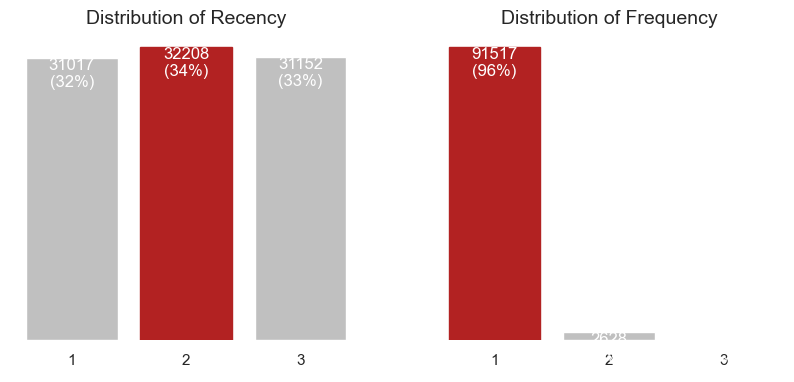

In [107]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R_score', 'F_score']):
    parameters = {'R_score':'Recency', 'F_score':'Frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

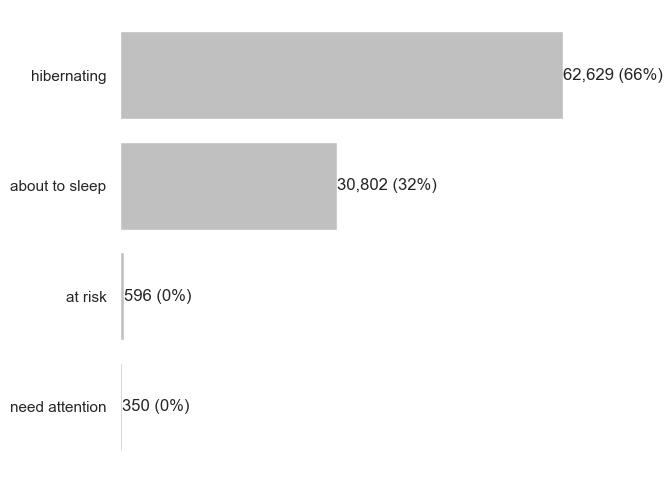

In [108]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()


### Выводы: ###

1. Более половины кастомеров относятся к сегменту Hibernating,они давно совершали небольшие покупки и не возвращались. Можно попробовать вернуть их персональной скидкой или акцией.  
2. Более 30% относится к сегменту  about to sleep, у которых дата последней покупки и частота ниже среднего. Данный сегмент подвержен риску полного ухода, поэтому нужно чаще напоминать о себе различными способами и давать промики. 